# Regression Tree


## Regular Training (with popularity scores of 0)

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

X_train = load_step("X_train")
X_test = load_step("X_test")
y_train = load_step("y_train")
y_test = load_step("y_test")

X_train_scaled = load_step("X_train_scaled")
X_test_scaled = load_step("X_test_scaled")

zero_y_train = load_step("y_train_nz")
zero_X_train = load_step("X_train_nz_scaled")
zero_y_test = load_step("y_test_nz")
zero_X_test = load_step("X_test_nz_scaled")

### Random Forest with Regression Trees

#### Random Forest -Unscaled Data-

In [ ]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,           
    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=15,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

#### Random Forest -Scaled Data-

In [ ]:

rf_scaled = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,            
    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=15,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 265.59
Random Forest (scaled) R²: 0.369

Top 10 wichtige Features (scaled):
acousticness        0.080579
duration_ms         0.077295
danceability        0.073570
loudness            0.070766
speechiness         0.070103
valence             0.069561
energy              0.068750
tempo               0.063058
instrumentalness    0.062442
liveness            0.058299
dtype: float64


### Regression Tree

#### Regression tree -Unscaled Data-

In [ ]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=16, min_samples_split=8, min_samples_leaf=80) # Before Optimization: none, 20, 20 #

# Fitting the Regressor
regressor.fit(X_train, y_train)

# Predict the Popularity
y_pred = regressor.predict(X_test)

# What do the metrics say about our model?
print
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print(f"R²: ", r2_score(y_test, y_pred))

# --- Before Optimization---  #

# Mean Squared Error:  366.9908745841802
# Mean Absolute Error:  14.545597567963474
# R²:  0.12762439147810323

# --- After Optimization---  #

# Mean Squared Error:  345.68702352872225
# Mean Absolute Error:  14.435585852955738
# R²:  0.17826586873396877

Mean Squared Error:  345.68702352872225
Mean Absolute Error:  14.435585852955738
R²:  0.17826586873396877


#### Regression tree -Scaled Data-

In [ ]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=16, min_samples_split=80, min_samples_leaf=8) # Before Optimization: none, 20, 20 #

# Fitting the Regressor
regressor.fit(X_train_scaled, y_train)

# Predict the Popularity
y_pred_scaled = regressor.predict(X_test_scaled)

# What do the metrics say about the model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred_scaled))
print(f"Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_scaled))
print(f"R²: ", r2_score(y_test, y_pred))

# --- Before Optimization---  #
# Mean Squared Error:  366.9908745841802
# Mean Absolute Error:  14.545597567963474
# R²:  0.12762439147810323

# --- After Optimization---  #
# Mean Squared Error:  345.68702352872225
# Mean Absolute Error:  14.435585852955738
# R²:  0.17826586873396877

Mean Squared Error:  345.6892696403903
Mean Absolute Error:  14.43602536572428
R²:  0.17826586873396877


### Visualization - Random forest

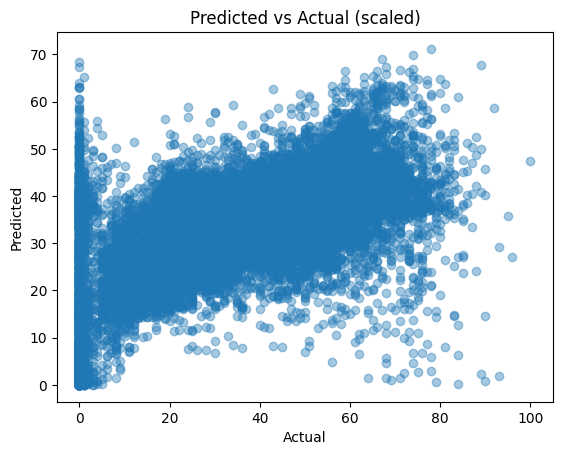

In [ ]:
# How did we do?
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()

### Visualization - Regression tree

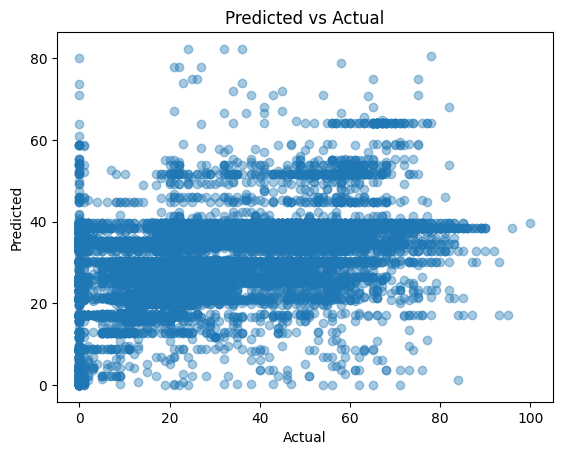

In [ ]:
# How did we do?
y_pred = regressor.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## No Zero Traning (No 0 Popularity)

#### Checking Data with and without popularity score of 0 via plots

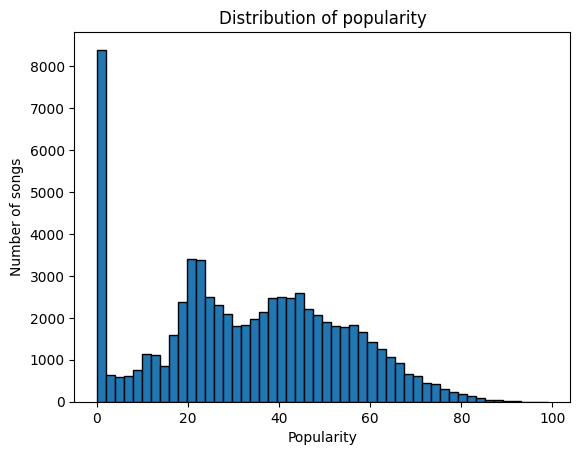

In [5]:
# Check for popularity 
count_zeros = (X_train == 0).sum()
total = len(y_train)
percent_zeros = count_zeros / total * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity')
plt.show()

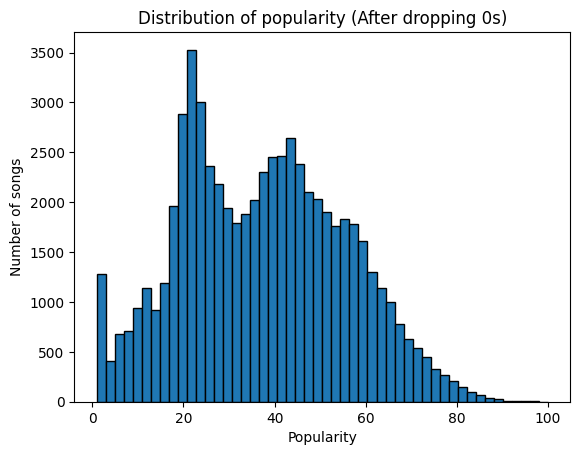

In [6]:
# Check for popularity again
count_zeros = (zero_X_train == 0).sum()
total = len(zero_y_train)
percent_zeros = (count_zeros / total) * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"Percent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(zero_y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity (After dropping 0s)')
plt.show()

### Train Random Forest (No 0s)

In [ ]:
# Random Forest Regressor 
rf_nz = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,           
    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=15,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_nz.fit(zero_X_train, zero_y_train)

# pred
zero_y_pred = rf_nz.predict(zero_X_test)

# performance
mse = mean_squared_error(zero_y_test, zero_y_pred)
r2 = r2_score(zero_y_test, zero_y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf_nz.feature_importances_, index=zero_X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 214.76
Random Forest R²: 0.341

Top 10 Important Features:
acousticness        0.080556
duration_ms         0.078603
instrumentalness    0.077531
loudness            0.070891
energy              0.070778
danceability        0.070056
speechiness         0.069516
valence             0.067281
tempo               0.059879
liveness            0.055090
dtype: float64


### Train Regression Tree (No 0s)

In [ ]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=12, min_samples_split=80, min_samples_leaf=8) # Before Optimization: none, 20, 20 #

# Fitting the Regressor
regressor.fit(zero_X_train, zero_y_train)

# Predict the Popularity
zero_y_pred = regressor.predict(zero_X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(zero_y_test, zero_y_pred))
print(f"Mean Absolute Error: ", mean_absolute_error(zero_y_test, zero_y_pred))
print(f"R²: ", r2_score(zero_y_test, zero_y_pred))

# --- Before Optimization---  #
# Mean Squared Error:  277.2397252752787
# Mean Absolute Error:  12.690305857097831
# R²:  0.14947869687653403

# --- After Optimization---  #
# Mean Squared Error:  258.4084825507577
# Mean Absolute Error:  12.510832994987224
# R²:  0.2072495415330522


Mean Squared Error:  258.4084825507577
Mean Absolute Error:  12.510832994987224
R²:  0.2072495415330522


## c. Optimization Code

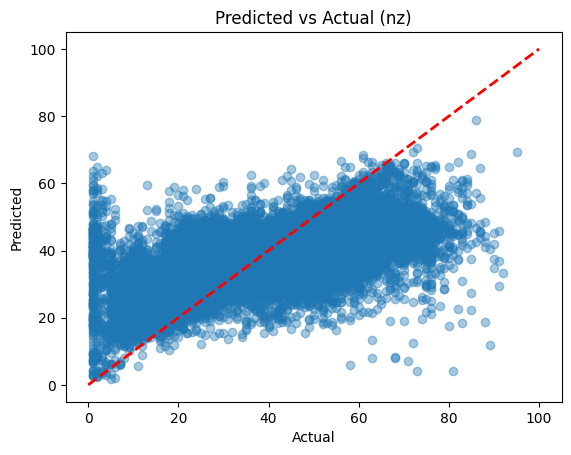

In [ ]:
# How did we do?
y_pred_scaled_nz = rf_nz.predict(zero_X_test)

plt.scatter(zero_y_test, y_pred_scaled_nz, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (nz)")
plt.show()

## c. Optimization

#### c.2 Optimization for Random Trees (No 0s)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV, KFold

# # Base estimator
# dt = DecisionTreeRegressor(random_state=42)

# # Expanded 3-parameter grid
# param_grid = {
#     "max_depth": [4, 6, 8, 10, 12, 14, 16, 20, None],   # 9
#     "min_samples_split": [2, 5, 10, 20, 40, 80],        # 6
#     "min_samples_leaf": [1, 2, 4, 8, 16, 20]            # 6
# }


# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# grid = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     scoring="neg_mean_squared_error",
#     cv=cv,
#     n_jobs=-1,
#     verbose=1
# )

# # grid.fit(X_train, y_train) # For Normal Sets
# grid.fit(zero_X_train, zero_y_train) # For Zero Sets

# print("Best params:", grid.best_params_)
# print("Best CV score (neg MSE):", grid.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 80}
Best CV score (neg MSE): -264.18718449400114


#### c.1 Optimization for Random Forest (No 0s)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import mean_squared_error, r2_score
# import pandas as pd
# import warnings

# # Suppress DataConversionWarning to keep output clean
# warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings('ignore', message='A column-vector y was passed when a 1d array was expected')

# # Base Random Forest estimator
# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Hyperparameter distributions for Random Forest optimization
# # Using distributions instead of fixed grids for randomized search
# param_distributions = {
#     "n_estimators": [100, 150, 200, 250, 300, 350, 400],   # number of trees in the forest
#     "max_depth": [20, 30, 40, 50, 60, None],               # maximum depth of each tree
#     "min_samples_split": [2, 3, 4, 5, 10, 15, 20],               # min samples required to split an internal node
#     "min_samples_leaf": [1, 2, 4, 6, 8],                   # min samples required at each leaf node
#     "max_features": ['sqrt', 'log2', 0.3, 0.5, 0.7, 10, 15, 20, 30]        # number of features to consider for best split
# }

# # Randomized search will sample 100 combinations from this space
# # With 5-fold CV = 500 fits (much faster than full grid search)

# # 5-fold cross-validation setup
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # RandomizedSearchCV for efficient hyperparameter search
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_distributions,
#     n_iter=100,                          # number of random combinations to try
#     scoring="neg_mean_squared_error",    # optimize for MSE (lower is better)
#     cv=cv,
#     n_jobs=-1,                           # use all available cores
#     verbose=2,                           # show progress (2 = more detailed output)
#     random_state=42                      # for reproducibility
# )

# # Fit randomized search on training data
# print("Starting hyperparameter optimization with RandomizedSearchCV...")
# print("Testing 100 random parameter combinations (much faster than GridSearch)...\n")

# # Convert y to 1d array to avoid DataConversionWarning
# zero_y_train_1d = zero_y_train.values.ravel() if hasattr(zero_y_train, 'values') else zero_y_train.ravel()

# random_search.fit(zero_X_train, zero_y_train_1d)

# # Display best parameters found
# print("\n" + "="*60)
# print("OPTIMIZATION RESULTS")
# print("="*60)
# print("Best hyperparameters found:")
# for param, value in random_search.best_params_.items():
#     print(f"  {param}: {value}")
# print(f"\nBest CV score (neg MSE): {random_search.best_score_:.2f}")
# print(f"Best CV RMSE: {(-random_search.best_score_)**0.5:.2f}")

# # Use best estimator for final predictions
# best_rf = random_search.best_estimator_
# zero_y_pred = best_rf.predict(zero_X_test)

# # Evaluate on test set
# mse = mean_squared_error(zero_y_test, zero_y_pred)
# r2 = r2_score(zero_y_test, zero_y_pred)
# rmse = mse ** 0.5

# print("\n" + "="*60)
# print("TEST SET PERFORMANCE")
# print("="*60)
# print(f"Optimized Random Forest MSE:  {mse:.2f}")
# print(f"Optimized Random Forest RMSE: {rmse:.2f}")
# print(f"Optimized Random Forest R²:   {r2:.3f}")
# print(f"Improvement in R² from 0.329: {r2 - 0.329:.3f}")

# # Feature importance from best model
# importances = pd.Series(best_rf.feature_importances_, index=zero_X_train.columns)
# importances = importances.sort_values(ascending=False)
# print("\n" + "="*60)
# print("TOP 10 MOST IMPORTANT FEATURES")
# print("="*60)
# print(importances.head(10))

# # Optional: View top 5 parameter combinations from random search
# print("\n" + "="*60)
# print("TOP 5 PARAMETER COMBINATIONS")
# print("="*60)
# results_df = pd.DataFrame(random_search.cv_results_)
# results_df = results_df.sort_values('rank_test_score')
# print(results_df[['params', 'mean_test_score', 'std_test_score']].head(5))